# Predicting Diabetes Using Machine Learning | Comparison of Classification Models 
By: Zachary Raup

## Project Introduction:
This project demonstrates how to classify whether a patient has diabetes using various machine learning models and techniques within the scikit-learn library. With diabetes being a leading cause of serious health issues, including heart disease, kidney failure, and vision loss, early detection and intervention are crucial for effective management and treatment. By leveraging machine learning algorithms, we can enhance diagnostic accuracy, enabling healthcare providers to identify at-risk individuals more efficiently.

The models applied in this project include Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree, Random Forest, and Support Vector Machine (SVM). To enhance model performance, techniques such as scaling, Random Forest feature importance analysis, and hyperparameter optimization are utilized. The models are evaluated using cross-validation metrics and visualized through confusion matrices and ROC curves, allowing for a comprehensive assessment of their effectiveness.

Ultimately, this project aims to provide insights into the best-performing models for diabetes prediction, contributing to more accurate and timely healthcare decisions. The findings may inform future research and applications in predictive analytics within the healthcare domain, potentially leading to better patient outcomes and reduced healthcare costs.


### Skills demonstrated in this project:

- [Data preprocessing with train_test_split and StandardScaler](#data_preprocessing:_split_and_scale_data)
- [Feature importance using Random Forest](#feature_importance_using_random_forest)
- [Hyperparameter Optimization with KNN and GridSearch](#hyperparameter_optimization_for_knn_with_gridsearch)
- [Model comparison (Logistic Regression, KNN, Decision Tree, Random Forest, SVM)](#compare_multiple_models)
- [Model evaluation using precision, recall, accuracy, and cross-validation metrics](#evaluate_models_on_test_set)
- [ROC Curves](#roc_curves)


### About the Data:
The dataset used is sourced from [DataCamp](https://app.datacamp.com) and was a practice dataset from the [Supervised Learning with scikit-learn course]([datacamp.com/learn/courses/supervised-learning-with-scikit-learn](https://app.datacamp.com/learn/courses/supervised-learning-with-scikit-learn)). It is a cleaned version of the diabetes dataset with no missing data, and the target variable, diabetes, is a binary column where 1 indicates that the patient has diabetes and 0 indicates that they do not. The "dpf" column refers to Diabetes Pedigree Function. This column provides a measure of the likelihood of diabetes based on a person's genetic history (family history) and the interaction of genetics with other risk factors. This cleaned dataset version allows this project to focus on model training, evaluation, and interpretation without worrying about data preprocessing issues like missing values.

### Load the Cleaned Diabetes Dataset
This section imports necessary Python libraries for data manipulation and visualization. It loads the cleaned diabetes dataset into a Pandas DataFrame, providing a structured view of the data, which is essential for subsequent processing.

In [1]:
# Importing libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
diabetes_df = pd.read_csv('datasets/diabetes_clean.csv')

# Preview the diabetes dataset
print(diabetes_df.head())


   pregnancies  glucose  diastolic  triceps  ...   bmi    dpf  age  diabetes
0            6      148         72       35  ...  33.6  0.627   50         1
1            1       85         66       29  ...  26.6  0.351   31         0
2            8      183         64        0  ...  23.3  0.672   32         1
3            1       89         66       23  ...  28.1  0.167   21         0
4            0      137         40       35  ...  43.1  2.288   33         1

[5 rows x 9 columns]


### Data Preprocessing: Split and Scale Data
Assign the feature variables (X) and target variable (y) and randomly split the dataset into training (80%) and testing (20%) sets with train_test_split from sklearn. The stratification ensures that the class distribution of the target variable (diabetes/no diabetes) is maintained, which is critical for balanced model evaluation. This section also applies standard scaling to the data. Scaling ensures that all feature values are normalized and on the same scale, which assists models like KNN and SVM that are sensitive to differences in feature magnitudes.

In [2]:
# Import train_test_split and StandardScaler from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assign features and target 
X = diabetes_df.drop("diabetes", axis=1).values      
y = diabetes_df["diabetes"].values   

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Feature Importance using Random Forest
In this section, a Random Forest classifier is trained to rank the features based on their importance towards classifying the target variable. The Random Forest model evaluates each feature's contribution by considering how much each one improves the accuracy of the model when used in tree splits. By identifying the top-ranked features, we can focus on the most informative variables, potentially simplifying the model, improving interpretability, and maintaining or enhancing performance. This step also helps identify redundant or irrelevant features, reducing the risk of overfitting and unnecessary complexity in the model.

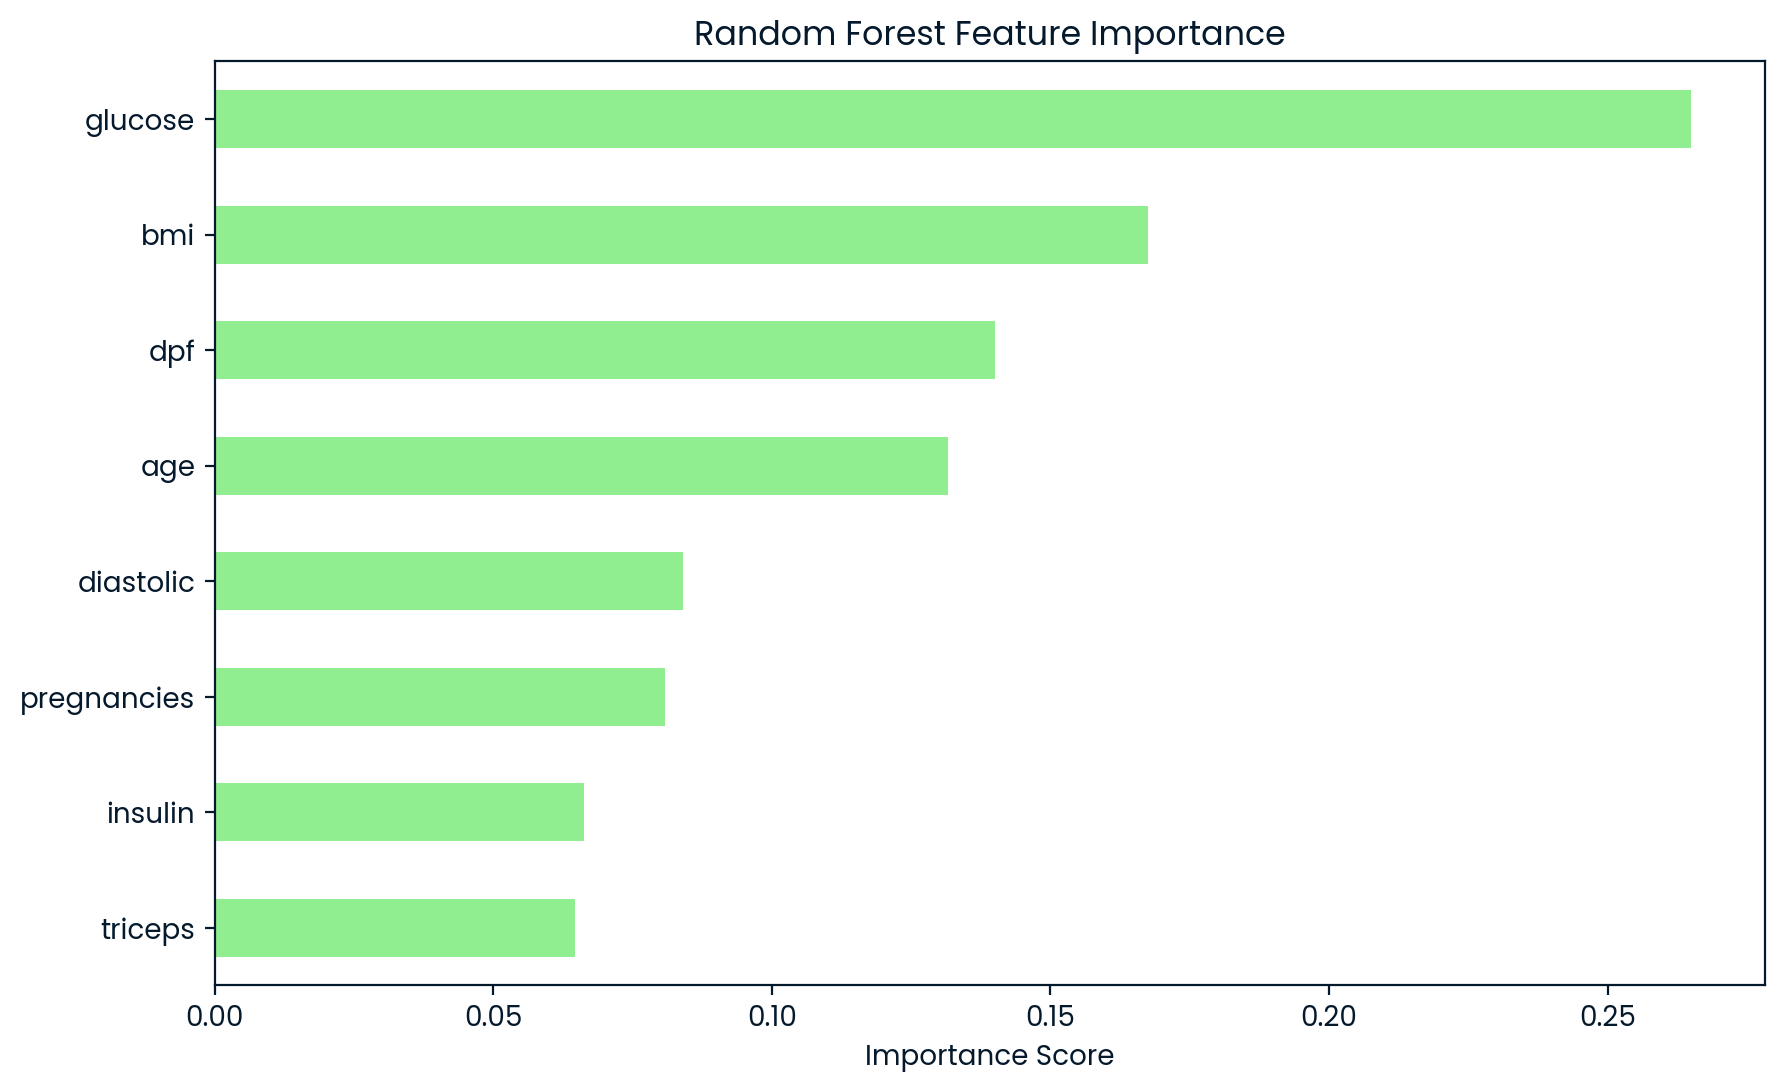

Selected Important Features: Index(['glucose', 'bmi', 'dpf', 'age'], dtype='object')


In [3]:
# Import RandomForestClassifier for feature importance
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Initialize and fit Random Forest on the scaled training data
rf = RandomForestClassifier(random_state=21)
rf.fit(X_train_scaled, y_train)

# Extract feature importances from the Random Forest model
importances = rf.feature_importances_

# Use the original feature names (before scaling)
feature_names = diabetes_df.columns[:-1]  

# Visualize feature importance using a bar chart
plt.figure(figsize=(10, 6))
pd.Series(importances, index=feature_names).sort_values().plot(kind='barh', color='lightgreen')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.show()

# Select the most important features based on Random Forest importance scores
important_features = feature_names[importances > 0.1]  
print(f"Selected Important Features: {important_features}")

# Get the indices of important features
important_feature_indices = [list(feature_names).index(feat) for feat in important_features]

# Redefine X with the important features only (for NumPy arrays)
X_train_imp = X_train[:, important_feature_indices]
X_test_imp = X_test[:, important_feature_indices]


#### Insights from Random Forest Feature Importance
The Random Forest model's feature importance analysis revealed that 'glucose' is the most significant predictor of diabetes, with a score of 0.26, as shown in the accompanying bar chart. The next most important features are 'bmi' (0.17), 'dpf' (0.14), and 'age' (0.13), with a notable drop in importance beyond these variables. To maintain the model's predictive accuracy while simplifying it, a threshold is set, retaining only features with an importance score greater than 0.1. This ensures that the model remains interpretable and efficient by focusing on the most impactful variables, while discarding those with lower predictive power.

### Hyperparameter Optimization for KNN with GridSearch
Next, optimize the K-Nearest Neighbors (KNN) model by selecting the best value for the n_neighbors hyperparameter. The n_neighbors parameter controls how many neighboring data points are considered when making a prediction, directly impacting the model's decision boundary. Smaller values of n_neighbors make the model more sensitive to local variations, while larger values provide smoother, more generalized predictions.

To find the optimal value, GridSearch is used from sklearn, which is a systematic approach that evaluates a range of possible n_neighbors values to identify the one that maximizes model accuracy. GridSearch works by performing an exhaustive search over the predefined hyperparameter space, selecting the configuration that yields the best performance based on cross-validation results. This process ensures that the KNN model generalizes well to unseen data, reducing the risk of overfitting and making the model more reliable and robust for predicting diabetes.

Best KNN Model:
Best score: 0.7948
Best parameters: {'knn__n_neighbors': 18}


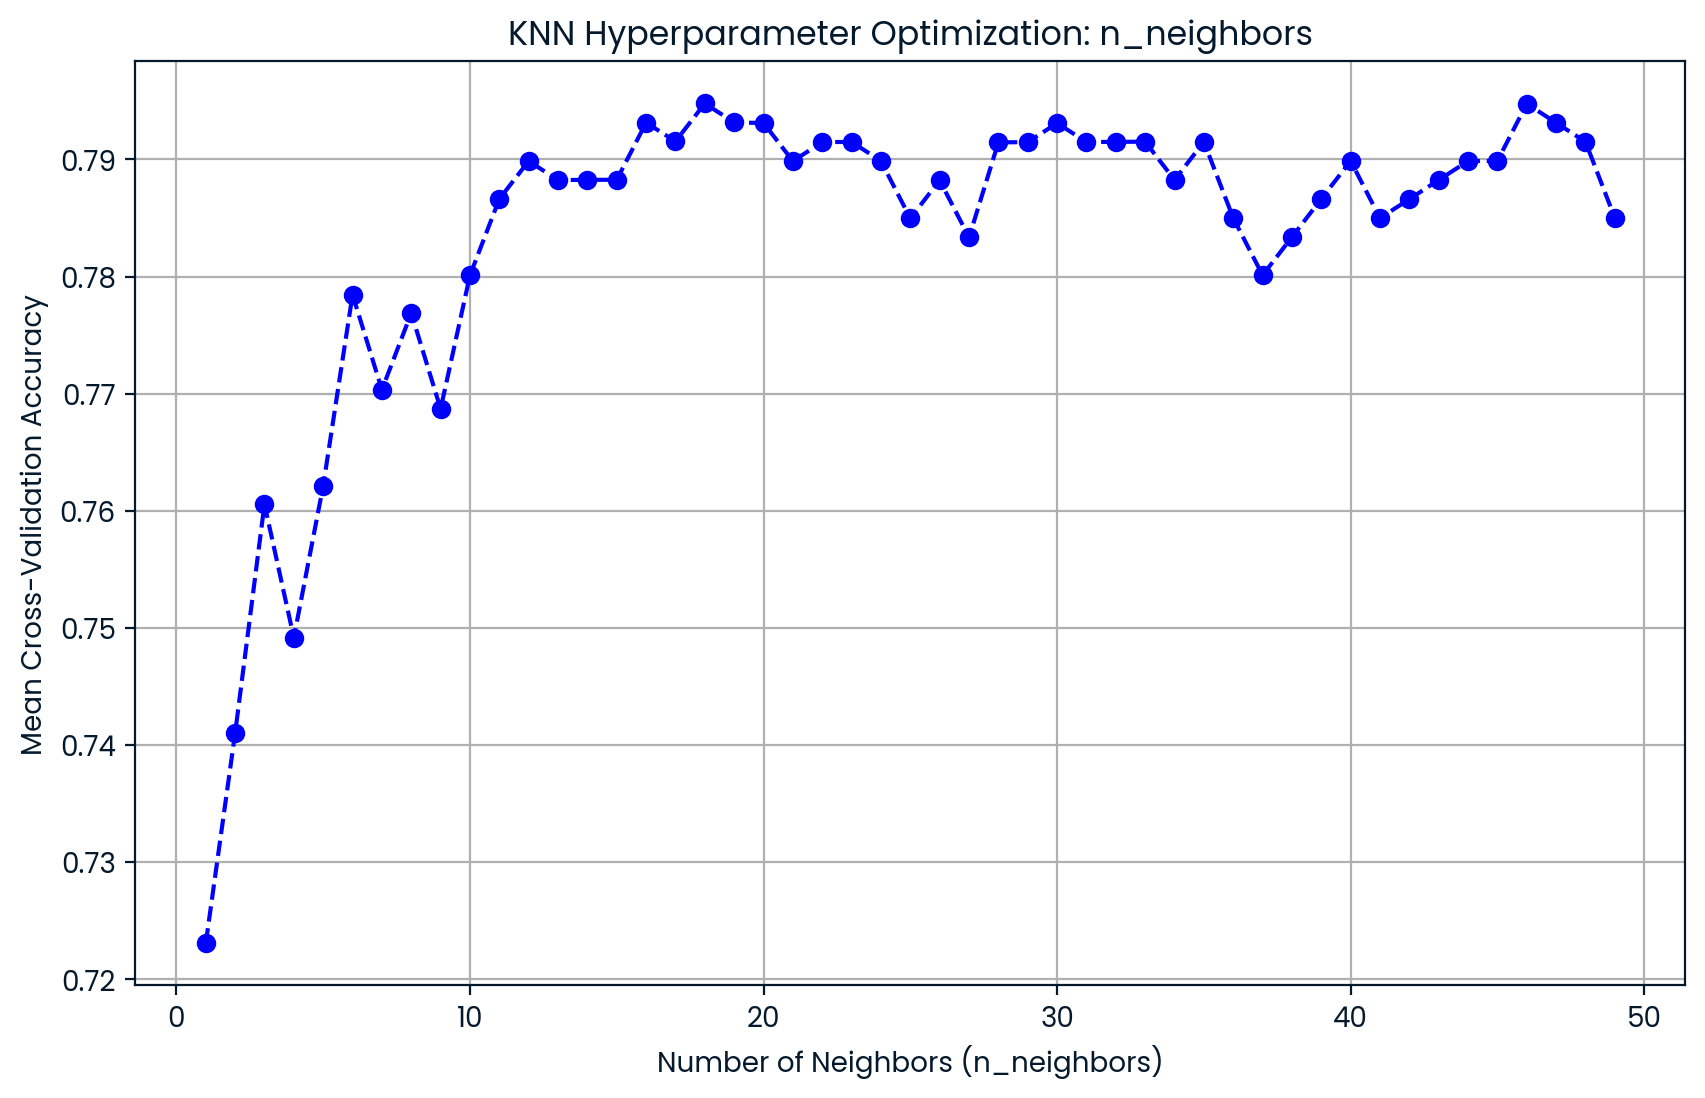

In [4]:
# Import KNeighborsClassifier, Pipeline, and GridSearchCV for hyperparameter tuning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Set up a pipeline for scaling and running the KNN model before using Grid Search
knn_pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

# Set up the parameter grid for GridSearch
knn_params = {"knn__n_neighbors": np.arange(1, 50)}

# Perform Grid Search to find optimal value for n_neighbor
grid_search = GridSearchCV(knn_pipeline, knn_params, cv=5)
grid_search.fit(X_train_imp, y_train)

# Extract the best n_neighbors value
best_n_neighbors = grid_search.best_params_['knn__n_neighbors']

# Print best hyperparameters and score
print("Best KNN Model:")
print(f"Best score: {grid_search.best_score_:.4f}")
print(f"Best parameters: {grid_search.best_params_}")

# Extract results from GridSearchCV
cv_results = grid_search.cv_results_

# Plot the mean test score vs n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(knn_params["knn__n_neighbors"], cv_results["mean_test_score"], marker='o', linestyle='--', color='b')
plt.title("KNN Hyperparameter Optimization: n_neighbors")
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.grid(True)
plt.show()


#### Analysis of Hyperparameter Tuning
The GridSearchCV process identified that the optimal value for the n_neighbors parameter in the K-Nearest Neighbors (KNN) model is 18, which yielded the highest mean cross-validation accuracy score of 0.79. This optimal number of neighbors enhances the balance between bias and variance, ensuring that the model generalizes well to unseen data. Going forward, the KNN models will be trained and tested using this optimal value of n_neighbors = 18, maximizing performance by utilizing the best configuration found during the grid search.

### Compare Multiple Models
In this section, we compare the performance of five different classification models: Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree, Random Forest, and Support Vector Machine (SVM). We will use cross-validation to evaluate each model's performance, which involves dividing the training data into multiple folds. This approach trains each model on several subsets and tests it on the remaining fold, providing a more reliable assessment of how well the model generalizes to unseen data. The comparison will help us identify the best-performing model based on accuracy.

- **Logistic Regression:** This model estimates the probability that a given input point belongs to a particular category. It uses a logistic function to model the relationship between the dependent variable (diabetes status) and one or more independent variables (features).

- **K-Nearest Neighbors (KNN):** KNN classifies a data point based on how its neighbors are classified. It identifies the 'k' closest training examples in the feature space and assigns the class most common among those neighbors.

- **Decision Tree:** This model creates a flowchart-like structure where each internal node represents a feature test, each branch represents an outcome of the test, and each leaf node represents a class label. Decision trees split the data at each node to maximize information gain or minimize impurity.

- **Random Forest:** An ensemble method that constructs multiple decision trees during training and outputs the mode of their predictions for classification tasks. It helps improve accuracy and control overfitting by averaging the results of individual trees.

- **Support Vector Machine (SVM):** SVM finds the optimal hyperplane that separates different classes in the feature space. It maximizes the margin between the classes, making it effective in high-dimensional spaces.

To evaluate these models, cross-validation is used to obtain a robust measure of accuracy.

Logistic Regression Cross-Validation Mean Accuracy: 0.7833
KNN Cross-Validation Mean Accuracy: 0.7557
Decision Tree Cross-Validation Mean Accuracy: 0.7052
Random Forest Cross-Validation Mean Accuracy: 0.7573
SVM Cross-Validation Mean Accuracy: 0.7655


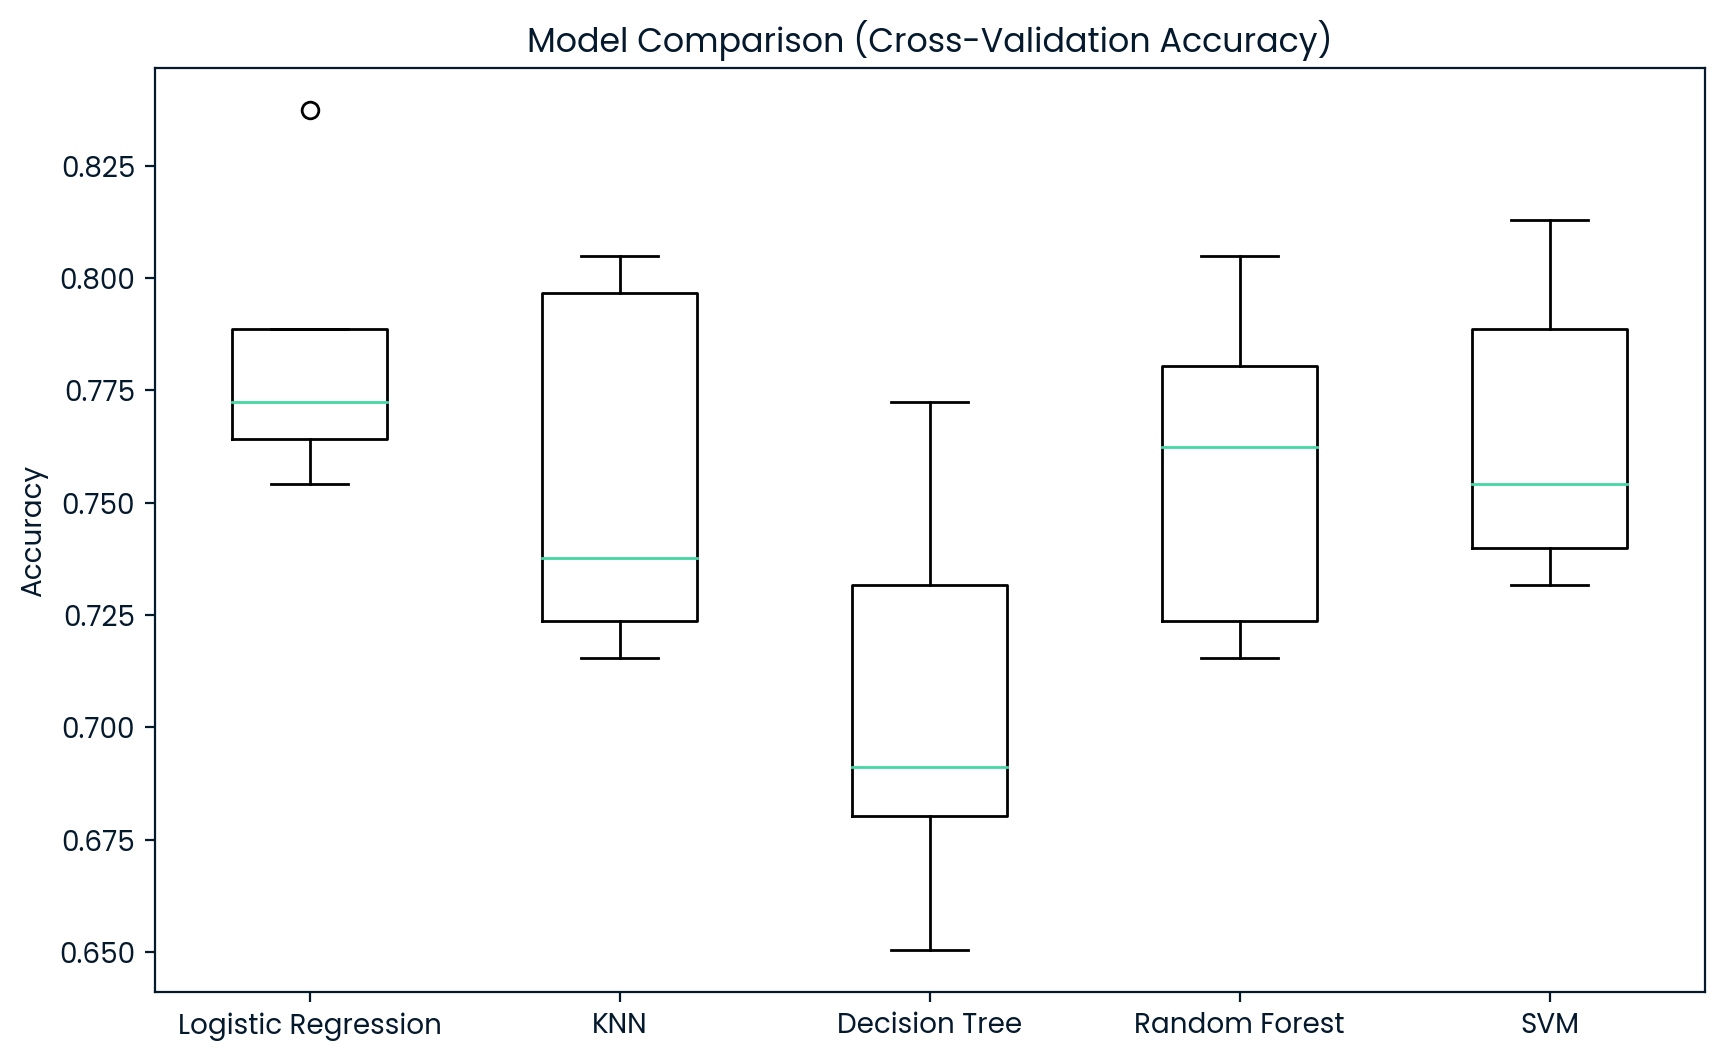

In [5]:
# Import classifiers and cross-validation tools
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

# Extract the best n_neighbors value
best_n_neighbors = grid_search.best_params_['knn__n_neighbors']

# Initialize classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=best_n_neighbors),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}

# Evaluate models using cross-validation
results = []
model_names = []
kf = KFold(n_splits=5, shuffle=True, random_state=21)

for name, model in models.items():
    cv_results = cross_val_score(model, X_train_imp, y_train, cv=kf)
    results.append(cv_results)
    model_names.append(name)
    print(f"{name} Cross-Validation Mean Accuracy: {cv_results.mean():.4f}")    
    
    
### Visualizing Cross-Validation Accuracy Comparison
# Plot the boxplot of cross-validation results
plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=model_names)
plt.title("Model Comparison (Cross-Validation Accuracy)")
plt.ylabel("Accuracy")
plt.show()


#### Analysis of the Training Model Comparison 
The **Logistic Regression** model stands out as the **most effective classifier** in this case, balancing accuracy with stability. For classifying whether a patient has diabetes, this model would likely generalize the best to unseen data. While **SVM and KNN** also **performed well**, they displayed slightly more variability. The Decision Tree and Random Forest models, while useful in some scenarios, did not perform as well for this specific dataset, showing lower accuracy and more significant variability. Therefore, based on the cross-validation results, Logistic Regression should be considered the preferred model for this task.

### Evaluate Models on Test Set
In this section, we train each model on the training data and evaluate their performance on the test set using key metrics: accuracy, confusion matrix, precision, recall, and F1 score. These metrics help us understand how well each model classifies patients as having diabetes or not.

- **Confusion Matrix**: Shows true positives, true negatives, false positives, and false negatives, providing insight into where the model misclassifies patients.

- **Accuracy:** The proportion of correct predictions out of all predictions, giving a general performance measure.

- **Precision:** Indicates how many of the predicted diabetic patients actually have diabetes, which is important to minimize false positives.

- **Recall:** Measures how well the model detects actual diabetic patients, highlighting its ability to avoid false negatives.

- **F1 Score:** Combines precision and recall, giving a balanced measure of model performance, especially useful with imbalanced data.

This evaluation ensures that we select the model that not only performs well on training data but also generalizes effectively to new patients, providing reliable diabetes predictions.

Logistic Regression Test Set Accuracy: 0.7403


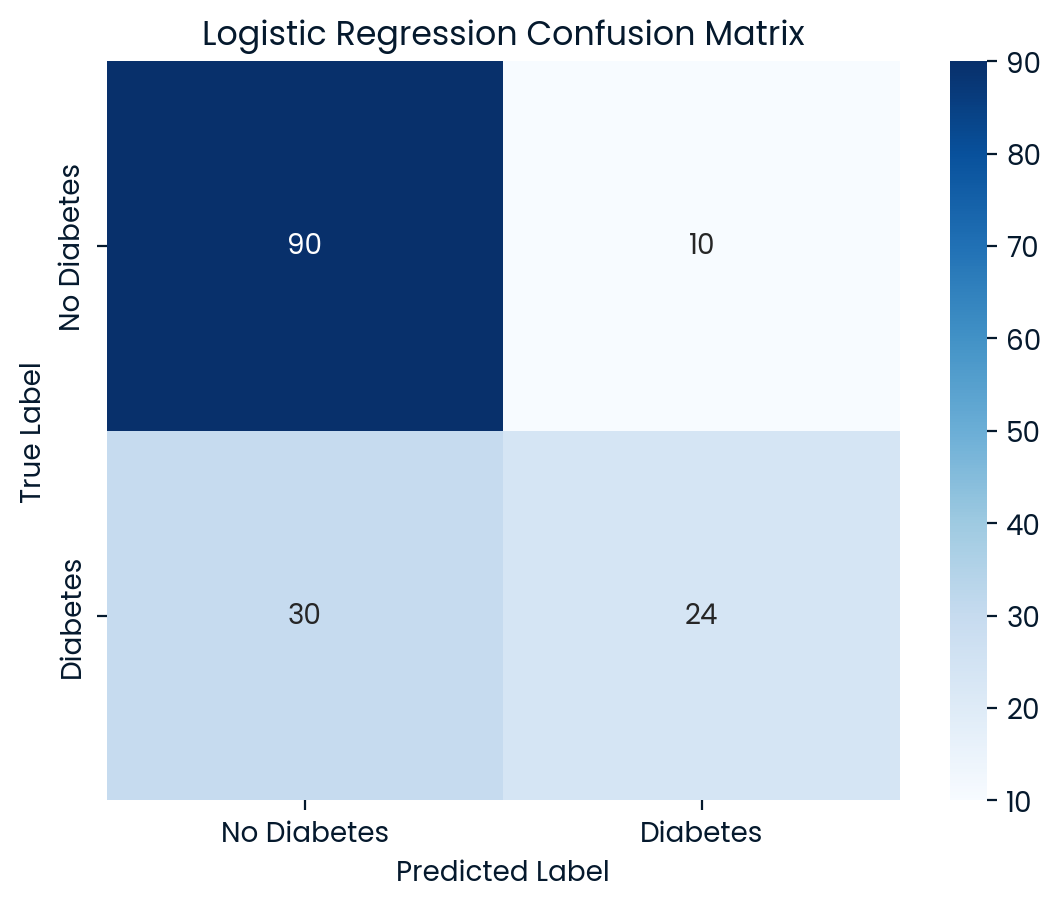

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       100
           1       0.71      0.44      0.55        54

    accuracy                           0.74       154
   macro avg       0.73      0.67      0.68       154
weighted avg       0.73      0.74      0.72       154

KNN Test Set Accuracy: 0.7597


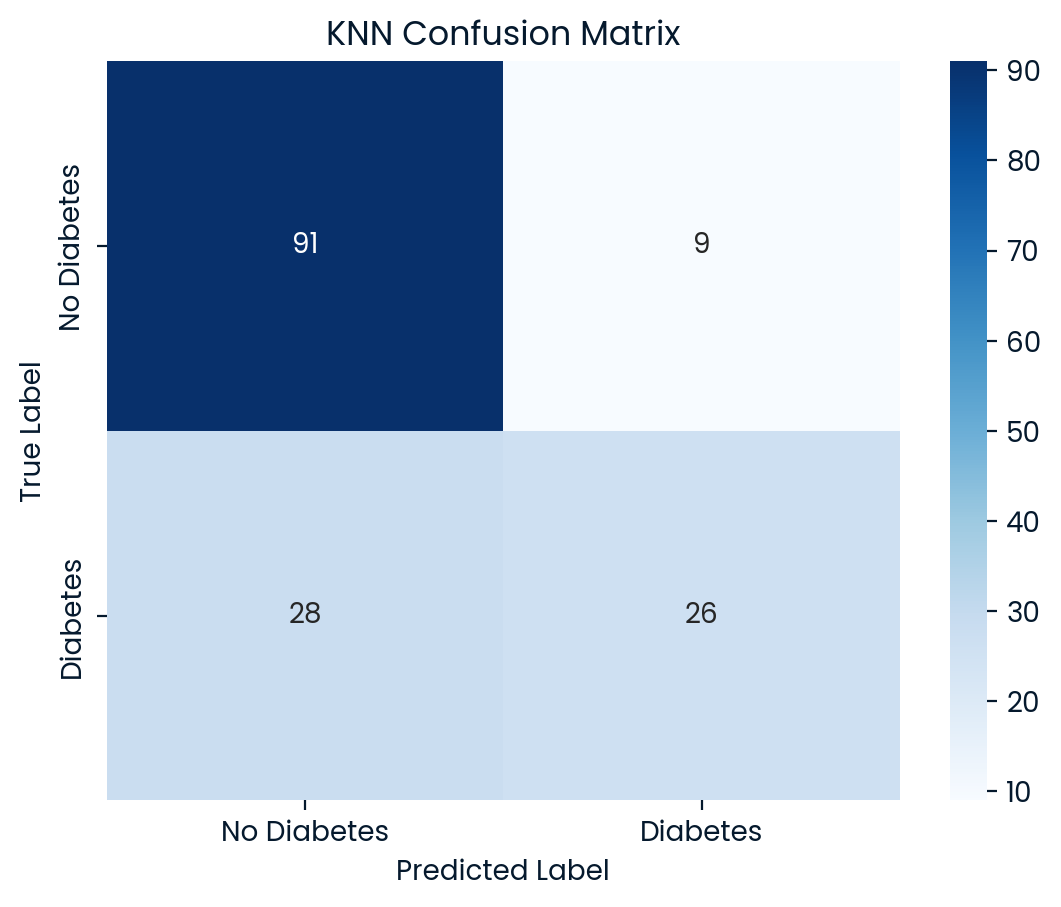

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       100
           1       0.74      0.48      0.58        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.71       154
weighted avg       0.76      0.76      0.74       154

Decision Tree Test Set Accuracy: 0.6688


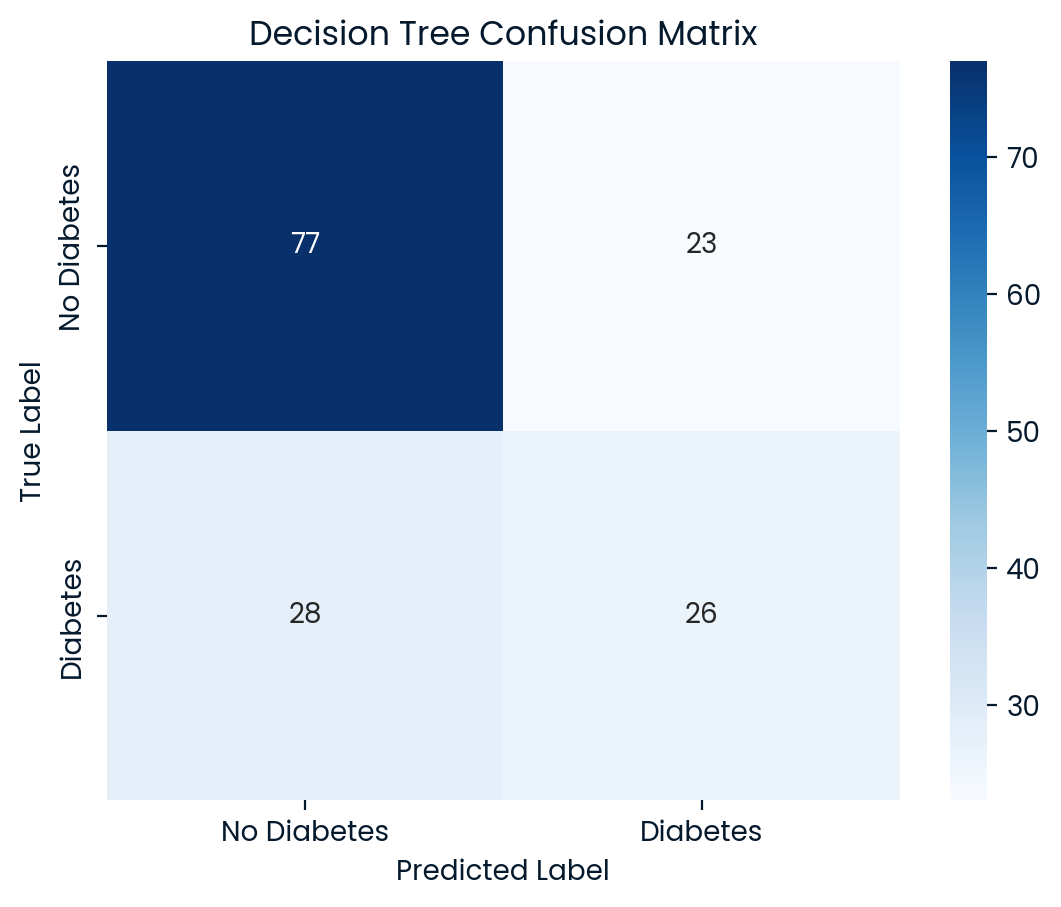

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       100
           1       0.53      0.48      0.50        54

    accuracy                           0.67       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.66      0.67      0.66       154

Random Forest Test Set Accuracy: 0.7338


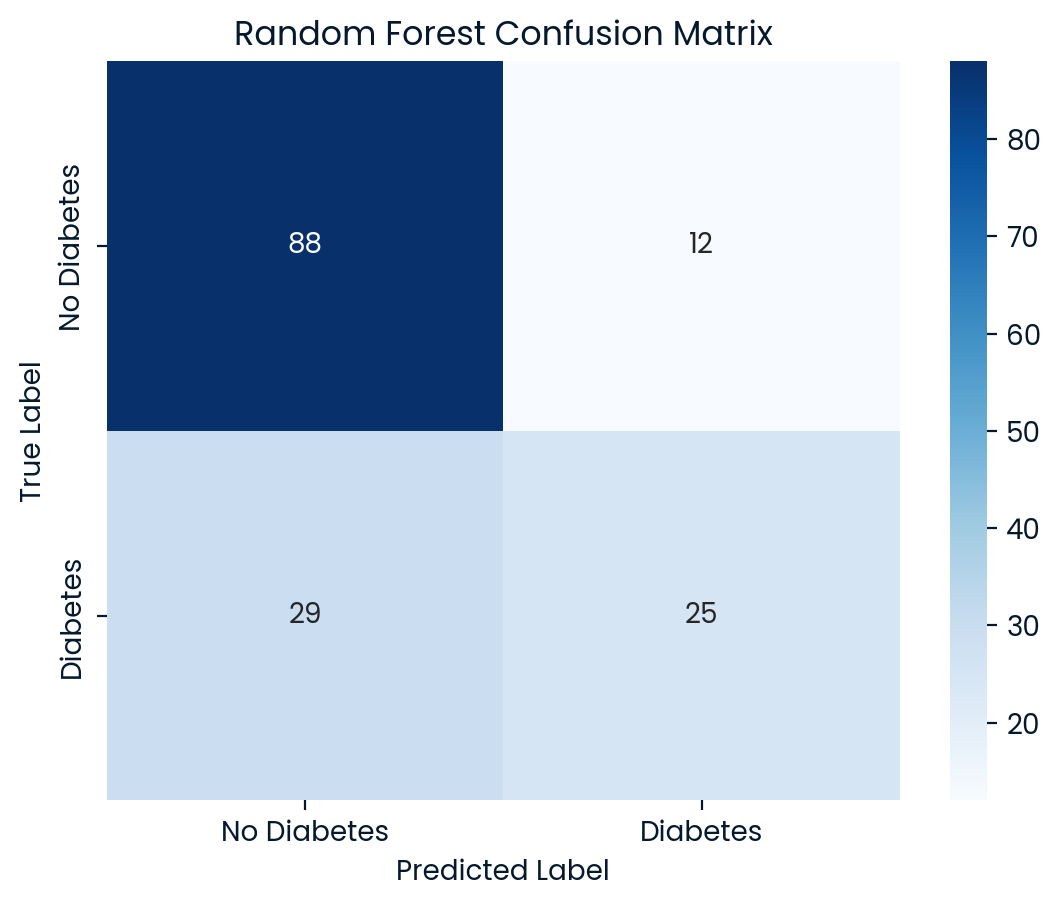

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       100
           1       0.68      0.46      0.55        54

    accuracy                           0.73       154
   macro avg       0.71      0.67      0.68       154
weighted avg       0.73      0.73      0.72       154

SVM Test Set Accuracy: 0.7468


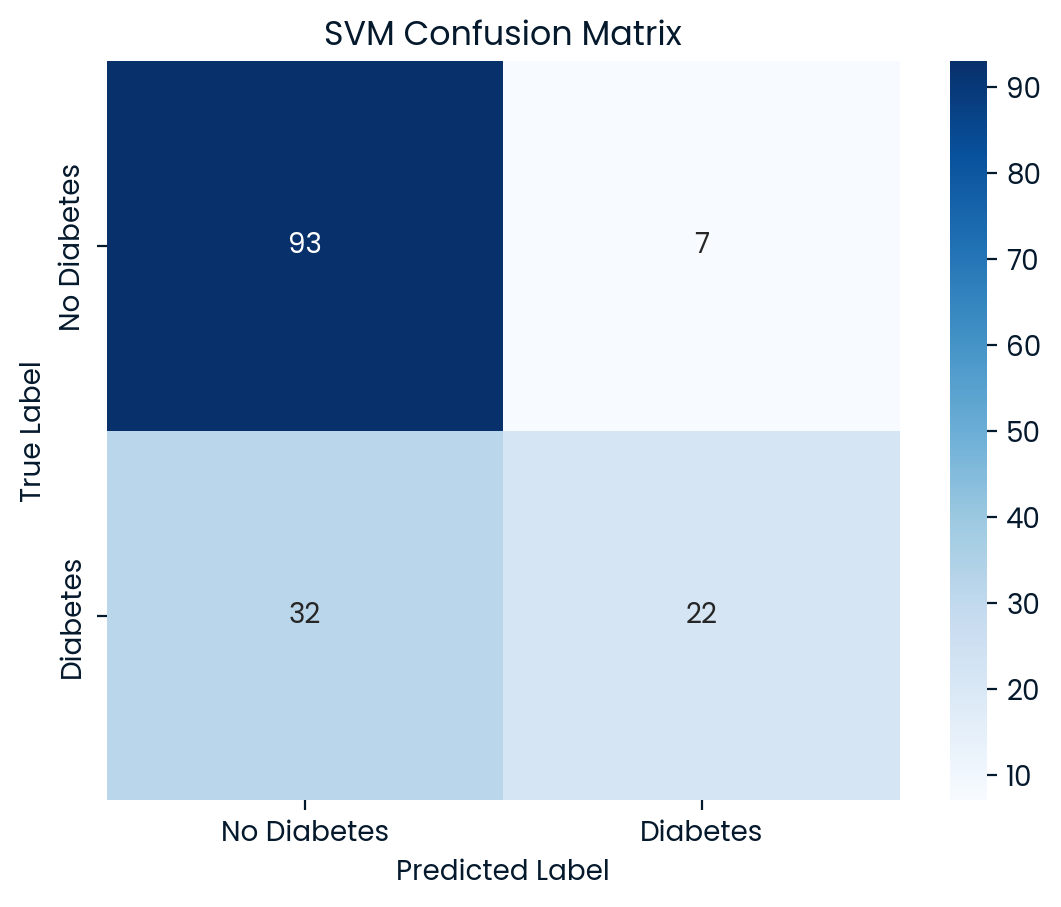

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.93      0.83       100
           1       0.76      0.41      0.53        54

    accuracy                           0.75       154
   macro avg       0.75      0.67      0.68       154
weighted avg       0.75      0.75      0.72       154



In [6]:
# Import necessary metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train models and evaluate on the test set
for name, model in models.items():
    model.fit(X_train_imp, y_train)     
    y_pred = model.predict(X_test_imp)  
    
    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Test Set Accuracy: {test_accuracy:.4f}")
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    # Classification report
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))


#### Analysis of Model Preformance on Test Data

Best Model: **KNN** achieved the **highest accuracy (75.97%) on the test set,** making it the best-performing model overall. However, the **SVM model** offered the **highest precision** for identifying diabetic patients (class 1), which could make it more suitable depending on whether precision or recall is prioritized in the application. While KNN showed a balanced performance, SVM was better at correctly identifying diabetic patients, although both models still had limitations.

Room for Improvement: A critical challenge observed across all models is the **low recall** for diabetic patients (class 1), meaning they missed a significant number of actual diabetic cases. In a healthcare setting, this poses serious risks, as failing to correctly identify diabetic patients can lead to inadequate care and treatment. Logistic Regression and Random Forest also performed competitively but faced similar issues with recall, while Decision Tree had the weakest performance overall.

Recommendation: **KNN and SVM stand out as the top models,** with KNN excelling in accuracy and SVM in precision for diabetic patients. However, given the healthcare context, **improving recall for diabetic patients is crucial**. Further optimization through hyperparameter tuning, feature engineering, or applying techniques such as resampling or cost-sensitive learning could address these recall shortcomings and improve the models' ability to detect diabetes in more sensitive applications.

### ROC Curves
ROC (Receiver Operating Characteristic) curves are useful for visualizing and evaluating a model's ability to distinguish between positive (diabetes) and negative (no diabetes) classes. They plot the true positive rate (recall) against the false positive rate, providing insight into the trade-offs between detecting true cases of diabetes and incorrectly classifying non-diabetic patients as diabetic.

In addition to the ROC curve, the Area Under the Curve (AUC) is a key metric that summarizes the model's performance. A higher AUC value indicates better performance, with a value of 1.0 representing a perfect model, while a value of 0.5 represents random guessing. By examining the ROC curves and AUC scores, we can assess how well each model balances sensitivity and specificity, helping to decide which model is best suited for the classification of diabetic patients.

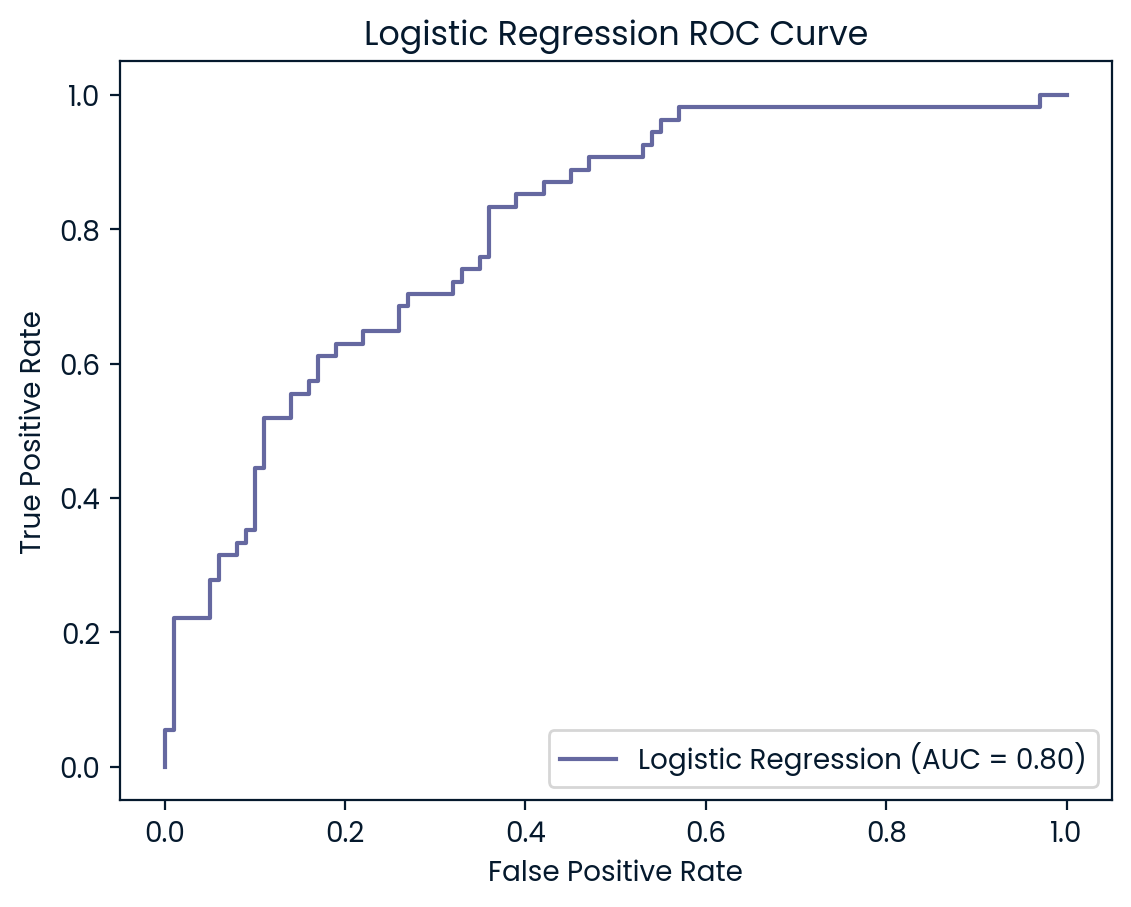

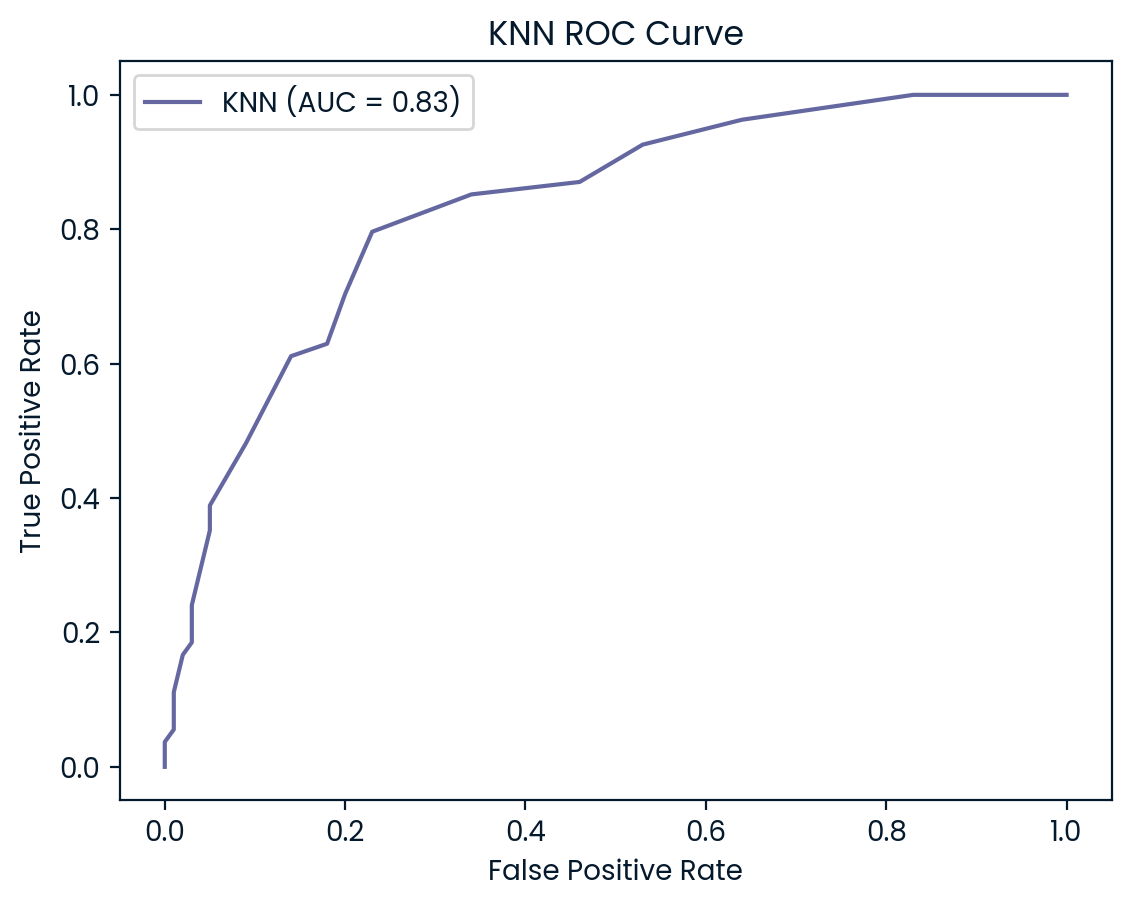

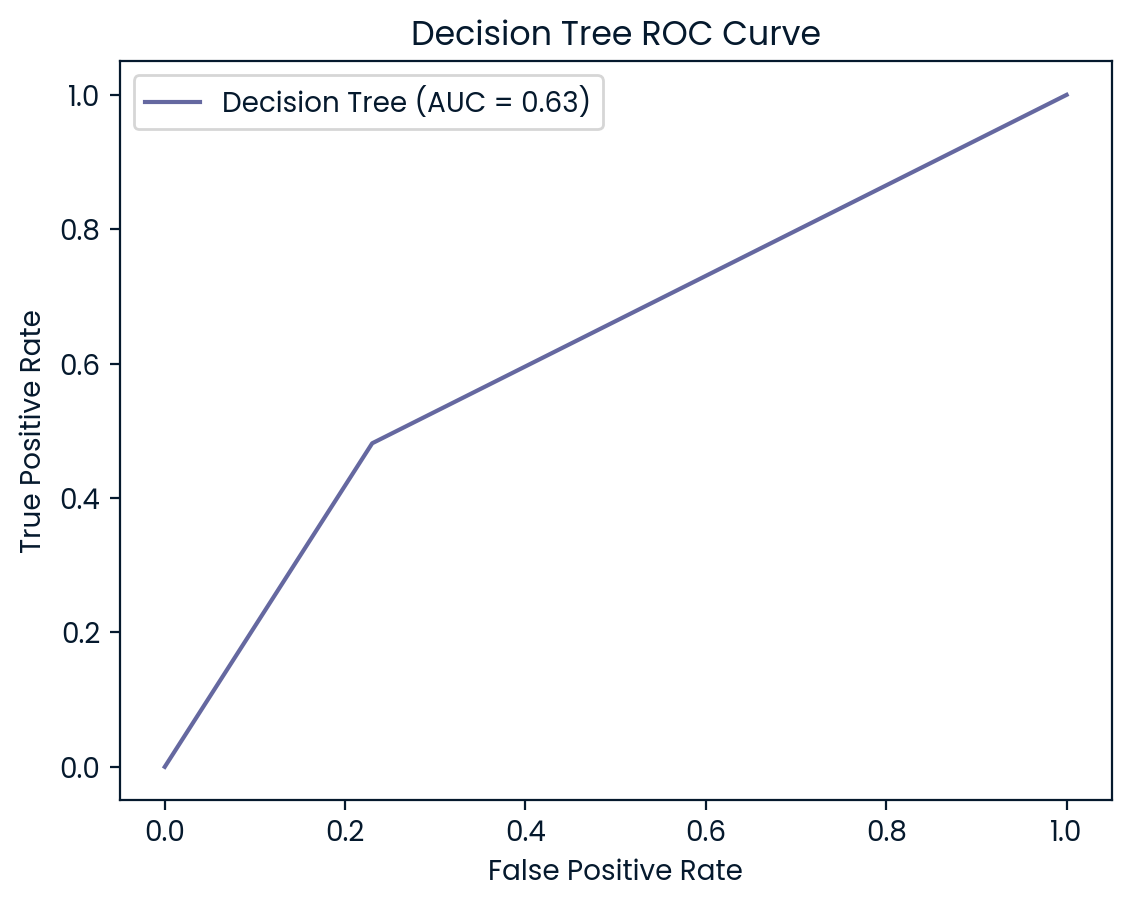

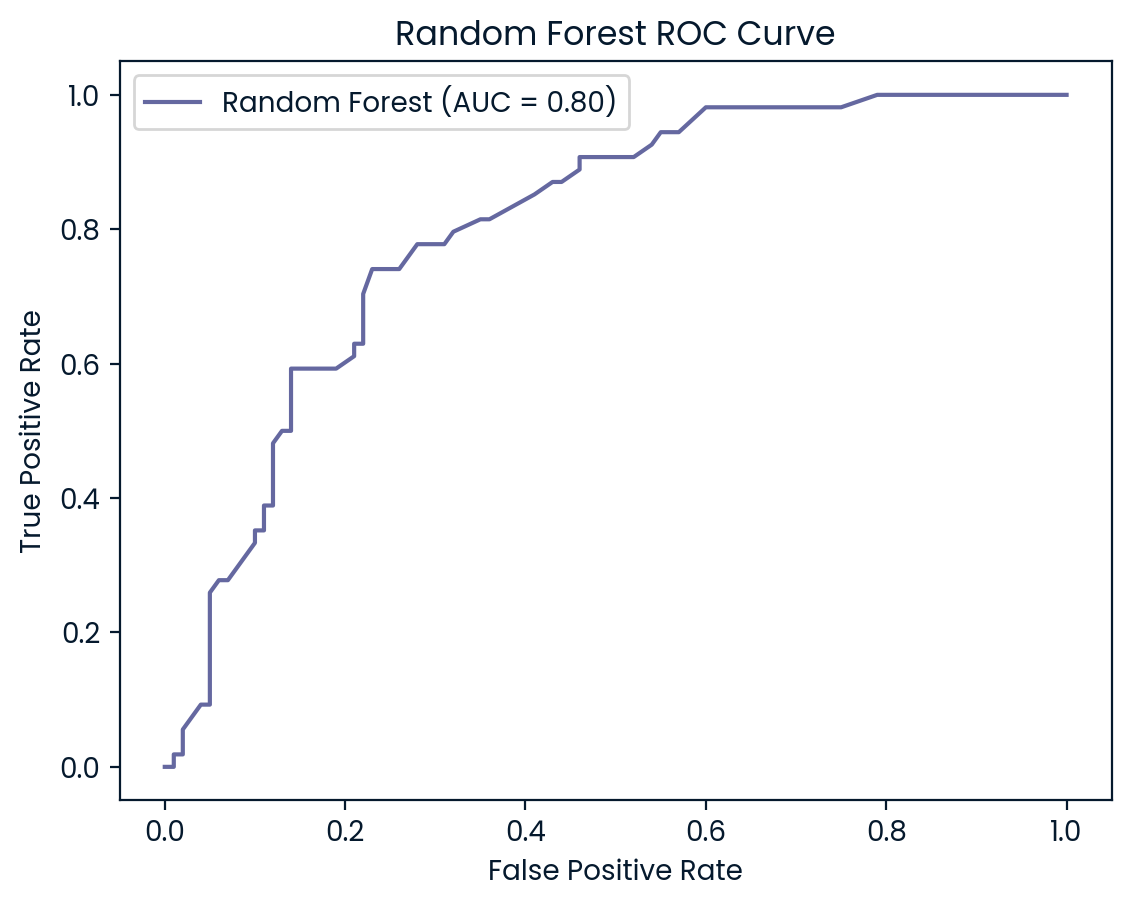

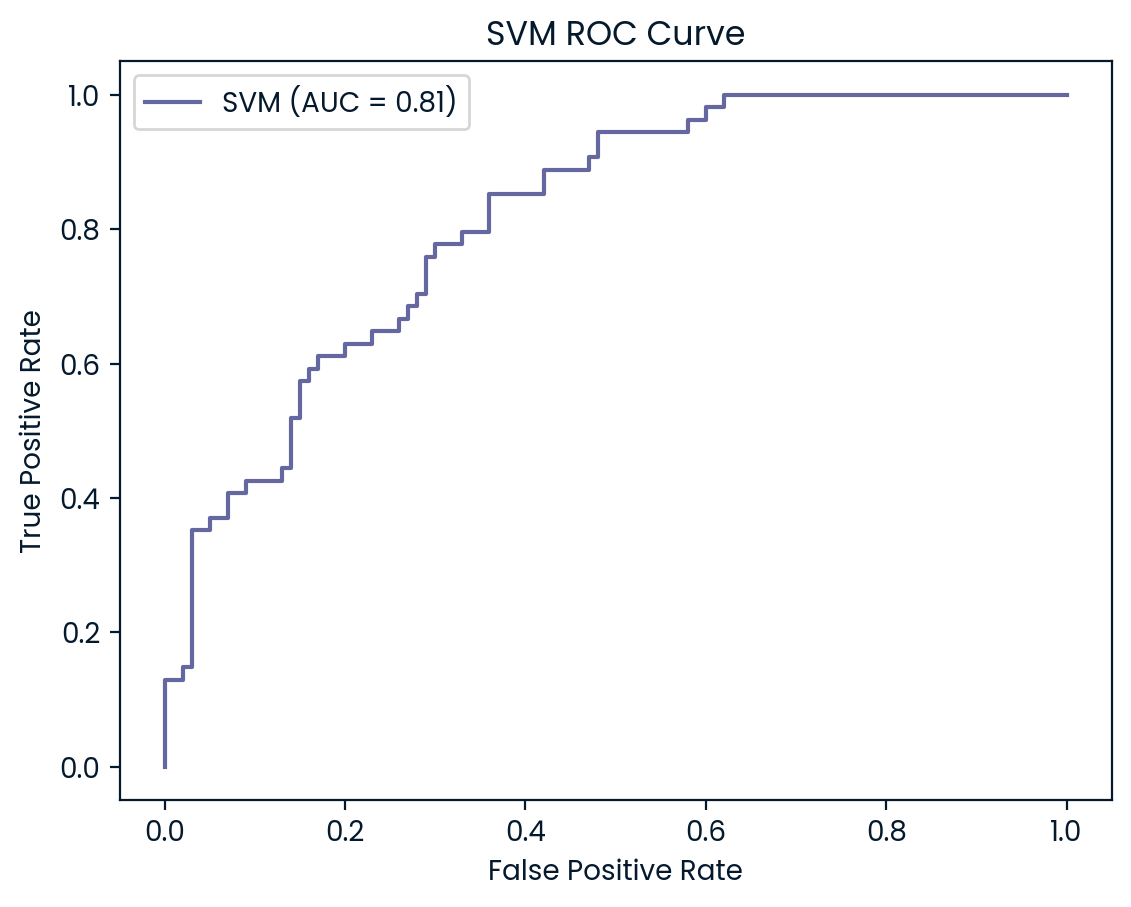

In [7]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Evaluate precision-recall and ROC-AUC curves for models
for name, model in models.items():
    y_proba = model.predict_proba(X_test_imp)[:, 1]

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.title(f"{name} ROC Curve")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()


#### ROC Curve and AUC Analysis
The ROC curves and AUC values provide additional insights into the models' ability to differentiate between diabetic and non-diabetic patients. **KNN (AUC: 0.83)** and **SVM (AUC: 0.82)** outperformed the other models, demonstrating strong capabilities in balancing true positives and false positives, which aligns with their higher test set accuracy and precision scores. Both models are particularly effective at maintaining a low false positive rate while accurately identifying diabetic cases, making them reliable choices for this classification task.

**Logistic Regression and Random Forest (both AUC: 0.81)** also performed well but slightly lagged behind KNN and SVM. However, **Decision Tree (AUC: 0.62)** struggled the most, indicating weaker performance in distinguishing between the two classes. This lower AUC suggests that the Decision Tree model is more likely to misclassify diabetic patients, further reinforcing its underperformance compared to the other models. Overall, **KNN and SVM emerge as the most robust models**, but all models could benefit from further tuning to improve recall for diabetic patients.

## Key Findings and Conclusion:
This project provides a comprehensive analysis of various machine learning models for predicting diabetes, highlighting essential insights for effective healthcare applications.

Key findings from the Random Forest feature importance analysis revealed that **glucose, BMI, Diabetes Pedigree Function (DPF), and age** are the **most influential features** in predicting diabetes. This emphasizes the critical role these factors play in identifying at-risk individuals and underscores their necessity in predictive modeling.

**Logistic Regression** emerged as the **most stable model**, offering a strong balance of accuracy and interpretability, making it well-suited for general diagnostic purposes such as patient consultations. In contrast, **K-Nearest Neighbors (KNN)** achieved the **highest accuracy on the test set**, making it ideal for initial screenings in large populations, where minimizing false negatives is vital. **Support Vector Machine (SVM)** demonstrated **superior precision**, positioning it as the preferred choice for scenarios where the cost of false positives is high, such as targeted interventions for at-risk patients.

While KNN and SVM excel in precision, **none of the models exhibited high recall**, indicating a need for enhancements through hyperparameter tuning and resampling techniques, particularly for applications focused on early detection and intervention.

The use of GridSearchCV to optimize the KNN model resulted in improved performance with the selected hyperparameter settings, demonstrating the significant impact of hyperparameter tuning on model accuracy.

In summary, the findings emphasize the need for careful model selection tailored to specific healthcare goals—be it accuracy, precision, or recall. By aligning the chosen model with these objectives and focusing on effective feature selection, proper scaling, and meticulous hyperparameter tuning, healthcare providers can enhance their decision-making processes. This approach ultimately contributes to better patient outcomes and more efficient resource management, paving the way for future research and applications in predictive analytics within the healthcare domain.

#### Helpful Links
[DataCamp Website](https://datacamp.com)  
[Supervisoed Learning with scikit-learn DataCamp Coure](https://app.datacamp.com/learn/courses/supervised-learning-with-scikit-learn)  
[scikit-learn Supervised Learning Documentation (scikit-learn.org)](https://scikit-learn.org/stable/supervised_learning.html)  
[StandardScaler Documentaion (scikit-learn.org)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)  
[GridSearchCV Documentation (scikit-learn.org)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)  
[Tuning the Hyper-Parameters Documentation (scikit-learn.org)](https://scikit-learn.org/stable/modules/grid_search.html)  
[Cross-validation Documentation (scikit-learn.org)](https://scikit-learn.org/stable/modules/cross_validation.html)  
[ROC Curve Documentaion (scikit-learn.org)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)